# CAR BRAND PREDICTION BY PANKAJ

In [1]:
 
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:

IMAGE_SIZE = [224, 224]
train_path = 'Datasets/train'
valid_path = 'Datasets/test'

In [3]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [4]:
for layer in resnet.layers:
    layer.trainable = False

In [5]:
folders = glob('Datasets/train/*')

In [6]:
x = Flatten()(resnet.output)

In [7]:
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=resnet.input, outputs=prediction)

In [8]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [9]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 344 images belonging to 3 classes.


In [12]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [13]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\panka\Anaconda3\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
11/11 [==============================] - 26s 2s/step - loss: 5.7521 - accuracy: 0.3517 - val_loss: 4.5964 - val_accuracy: 0.2414
Epoch 2/50
11/11 [==============================] - 29s 3s/step - loss: 2.6837 - accuracy: 0.3983 - val_loss: 3.6919 - val_accuracy: 0.1552
Epoch 3/50
11/11 [==============================] - 30s 3s/step - loss: 1.9335 - accuracy: 0.4273 - val_loss: 0.8743 - val_accuracy: 0.5517
Epoch 4/50
11/11 [==============================] - 34s 3s/step - loss: 1.2194 - accuracy: 0.4709 - val_loss: 1.2826 - val_accuracy: 0.4483
Epoch 5/50
11/11 [==============================] - 36s 3s/step - loss: 0.9336 - accuracy: 0.5436 - val_loss: 1.1299 - val_accuracy: 0.4483
Epoch 6/50
11/11 [==============================] - 36s 3s/step - loss: 0.9412 - accuracy: 0.5814 - val_loss: 0.7779 - val_accuracy: 0.7069
Epoch 7/50
11/11 [==============================] - 34s 3s/step - loss: 1.0968 - accuracy: 0.5640 - val_loss: 1.0547 - val_accuracy: 0.4310
Epoch 8/50
11/11 [==

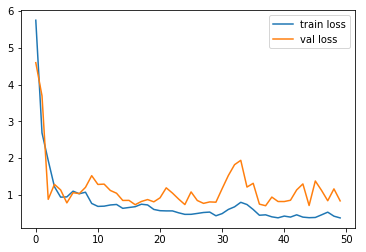

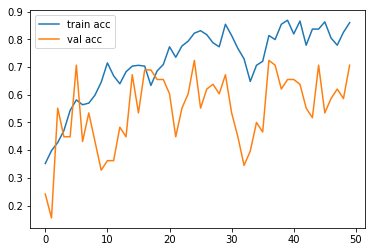

<Figure size 432x288 with 0 Axes>

In [14]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [15]:
from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

C:\Users\panka\Anaconda3\lib\site-packages\keras\utils\generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [16]:
y_pred = model.predict(test_set)

In [17]:
y_pred

array([[4.6398141e-03, 2.0100747e-03, 9.9335009e-01],
       [1.7171121e-01, 3.5553885e-01, 4.7274992e-01],
       [4.8225246e-02, 8.9730245e-01, 5.4472346e-02],
       [8.8952575e-03, 9.1865027e-01, 7.2454460e-02],
       [9.4793752e-02, 2.2841063e-01, 6.7679560e-01],
       [6.3263913e-05, 9.9939859e-01, 5.3809257e-04],
       [1.3896650e-01, 2.2133552e-02, 8.3889997e-01],
       [1.8283729e-01, 7.5322914e-01, 6.3933574e-02],
       [5.6596693e-02, 7.2342589e-02, 8.7106067e-01],
       [1.1259351e-01, 4.7608758e-03, 8.8264567e-01],
       [3.4898035e-02, 9.6163231e-01, 3.4697063e-03],
       [4.3847477e-01, 6.1094474e-02, 5.0043076e-01],
       [1.3641821e-01, 2.7825913e-01, 5.8532274e-01],
       [4.5256683e-01, 2.6295644e-01, 2.8447670e-01],
       [5.1707429e-01, 5.0630447e-02, 4.3229526e-01],
       [1.1456438e-01, 7.3599207e-05, 8.8536203e-01],
       [6.7881465e-02, 1.4257253e-04, 9.3197602e-01],
       [5.8450770e-01, 4.9051110e-02, 3.6644119e-01],
       [2.3363386e-01, 4.532

In [18]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [19]:
y_pred

array([2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 0, 0, 2, 2, 0, 2, 2, 1, 1,
       2, 1, 1, 0, 0, 2, 2, 1, 0, 0, 0, 0, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1,
       0, 1, 0, 1, 0, 2, 1, 0, 2, 0, 1, 0, 2, 1], dtype=int64)

In [20]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [21]:
model=load_model('model_resnet50.h5')

In [22]:
img=image.load_img('Datasets/Test/lamborghini/11.jpg',target_size=(224,224))

In [23]:
x=image.img_to_array(img)
x

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [196., 187., 172.],
        [217., 208., 193.],
        [243., 234., 219.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 245., 237.],
        [243., 243., 235.],
        [242., 242., 234.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [240., 249., 248.],
        [242., 251., 250.],
        [242., 251., 250.]],

       ...,

       [[189., 207., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 206., 227.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 2

In [24]:
x.shape

(224, 224, 3)

In [25]:
x=x/255

In [26]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [27]:
model.predict(img_data)

array([[9.5527852e-01, 1.6567297e-08, 4.4721555e-02]], dtype=float32)

In [28]:
a=np.argmax(model.predict(img_data), axis=1)

In [29]:
a

array([0], dtype=int64)